## Plot up the noble gas data from Atasund, Jakobshavn, and Sermilik

We saw that in Atasund there was a lot of 'extra' helium in the watercolumn, above even what we expect from the bubbles introcuded by submarine glacial melt. The way we can see this is by looking at the ratio of helium to neon, and the ratio of helium isotopes, both of which have a characteristic ratio in the atmosphere. Any departure from that atmospheric ratio implies some change in the ice-trapped bubbles. 

Possible candiates are fractionation taking place during firn close off ($^3$He escapes faster than $^4$He). OR the input of $^4$He from $\alpha$-decay in the bedrock (where $\alpha$ particles, $^4$He, can accumulate in the ice over time).


The Sermilik data looked different: we still see some extra He, but not nearly as big a signal as in West Greenland. Here I'm going to plot some of the characteristic ratios to try to figure out how much helium is in the ice around Sermilik.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# load in the Sermilik data
fname = '/Users/beaird/Google Drive/data/greenland/cruise_data/2015/SERM2015/noble_gas_data/NLB2_Data_remove3bad.xlsx'
SERMdata = pd.read_excel( fname, sheet_name=0 ) 

# lets replace the annoying parenthesis in the column headers
SERMdata.columns = SERMdata.columns.str.replace("[()]", "")

# add the d3He concentration:

SERMdata['C3He'] = SERMdata.CHe*(1.384e-6)*(1+SERMdata.Del3HeC/100);

print(SERMdata.head())

  cruise  station  pressure  temperature  salinity  bottle  duplicate  \
0   NLB2        3   348.590     3.062841    34.668       4          0   
1   NLB2        3   549.530     3.329209    34.733       2          0   
2   NLB2        3   676.810     3.458174    34.759       1          0   
3   NLB2        4    99.731     0.697784    33.572       8          0   
4   NLB2        4   149.110     2.079189    34.119       7          0   

    Del3HeC           CHe           CNe       CAr           CKr           CXe  \
0 -1.388644  4.182880e-08  1.813060e-07  0.000354  8.505346e-08  1.267474e-08   
1 -1.629538  4.115493e-08  1.796889e-07  0.000353  8.499129e-08  1.265108e-08   
2 -1.114626  4.082559e-08  1.779882e-07  0.000350  8.418124e-08  1.254072e-08   
3 -6.546533  5.184951e-08  2.068637e-07  0.000372  8.848592e-08  1.318815e-08   
4 -3.625639  4.928658e-08  2.031610e-07  0.000364  8.610520e-08  1.269409e-08   

       DelHe      DelNe     DelAr     DelKr     DelXe          C3He  
0   

In [3]:
#  now let's load in the data from Atasund
fname = '/Users/beaird/Google Drive/data/greenland/cruise_data/2014/DISKO/OMPA/Data.xlsx' 
WGdata = pd.read_excel(fname)

# remove parenth:
WGdata.columns = WGdata.columns.str.replace("[()]", "")

# add the d3He concentration
WGdata['C3He'] = WGdata.CHe*(1.384e-6)*(1+WGdata.Del3He/100);


print(WGdata.head())

   station  pressure  temperature  salinity  bottle  dup     Del3He  \
0        3    151.64       1.9888    33.643       1    0  -2.706823   
1        3    198.17       1.8544    33.793       2    0  -2.882810   
2        3    245.72       2.1697    33.985       3    0  -2.397813   
3        3    296.31       2.8332    34.187       4    0  -2.791979   
4        4      0.00       0.2977    30.220       4    0 -21.477291   

            CHe           CNe       CAr           CKr           CXe  \
0  4.222341e-08  1.838919e-07  0.000373  9.091579e-08  1.371027e-08   
1  4.349350e-08  1.862069e-07  0.000370  8.996205e-08  1.353768e-08   
2  4.338790e-08  1.855837e-07  0.000365  8.861292e-08  1.326648e-08   
3  4.353891e-08  1.838557e-07  0.000358  8.664651e-08  1.298630e-08   
4  7.016292e-08  2.366071e-07  0.000390  8.996954e-08  1.329659e-08   

           C3He  
0  5.685541e-14  
1  5.845969e-14  
2  5.860899e-14  
3  5.857546e-14  
4  7.624986e-14  


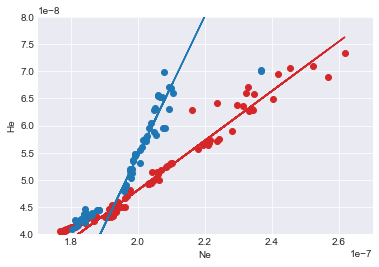

In [10]:
# make a model to fit the He/Ne ratio
Smodel = LinearRegression(fit_intercept=True)
Smodel.fit(SERMdata.CNe[ SERMdata.CNe > 1.9e-7, np.newaxis], SERMdata.CHe[ SERMdata.CNe > 1.9e-7])
Syfit = Smodel.predict(SERMdata.CNe[:, np.newaxis])


Amodel = LinearRegression(fit_intercept=True)
Amodel.fit(WGdata.CNe[ (WGdata.CNe > 1.9e-7) & (WGdata.CNe < 2.2e-7), np.newaxis], WGdata.CHe[(WGdata.CNe > 1.9e-7) & (WGdata.CNe < 2.2e-7)])
Ayfit = Amodel.predict(WGdata.CNe[:, np.newaxis])

plt.scatter(SERMdata.CNe, SERMdata.CHe, color='tab:red')
plt.plot(SERMdata.CNe, Syfit, color='tab:red')
plt.scatter(WGdata.CNe, WGdata.CHe, color='tab:blue')
plt.plot(WGdata.CNe, Ayfit, color='tab:blue')
plt.xlim([1.7e-7, 2.7e-7])
plt.ylim([4e-8, 8e-8])

plt.xlabel('Ne')
plt.ylabel('He')


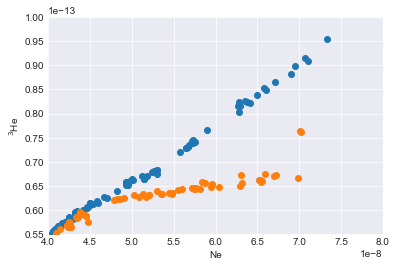

In [5]:
plt.scatter(SERMdata.CHe, SERMdata.C3He)
plt.scatter(WGdata.CHe, WGdata.C3He)
plt.ylim([5.5e-14, 10e-14])
plt.xlim([4e-8, 8e-8])

plt.xlabel('Ne')
plt.ylabel('$^3$He')
